In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Amazon_Reviews_2021.csv')
dataset.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [3]:
dataset.iloc[0:6, [15,20]]

,reviews.doRecommend,reviews.text
0,False,I thought it would be as big as small paper bu...
1,True,This kindle is light and easy to use especiall...
2,True,Didnt know how much i'd use a kindle so went f...
3,True,I am 100 happy with my purchase. I caught it o...
4,True,Solid entry level Kindle. Great for kids. Gift...
5,False,This make an excellent ebook reader. Don't exp...


In [4]:
dataset["Y"]=dataset["reviews.doRecommend"].copy()
dataset["Y"]=dataset["Y"].apply(lambda x:1 if x==True else 0)
dataset["Y"]

0       0
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: Y, Length: 5000, dtype: int64

#### CLEANINIG TEXTS
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. Stemming is an important part of the pipelining process in Natural language processing. The input to the stemmer is tokenized words.

Some more example of stemming for root word "like" include: ->"likes" ->"liked" ->"likely" ->"liking"

https://www.geeksforgeeks.org/introduction-to-stemming/

In [5]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.porter import PorterStemmer
# to store clean sentences after removing stopwords....
corpus=[]

# now to operate on strings and text will use "re" module...
for i in range(1000):
    #basically it will replace all the characters which are not aplhabets(lower or upper),that is punctuations will be replaced
    review=re.sub('[^a-zA-Z]',' ',dataset["reviews.text"][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    # now we will remove irrevelant words isong stopwords and do stemming only on proper english words....
    all_stopwords=stopwords.words("english")
    all_stopwords.remove("not")
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)
    
    
    
    
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# corpus

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
# max_features's value is set at random.... u can change the value and test the result
X=cv.fit_transform(corpus).toarray()
y=dataset["Y"].head(len(X)).values
print(X.shape)
print(y.shape)

(1000, 1500)
(1000,)


In [8]:
len(X[0])
# so this shows that there are 1566 total different words...and each row of X shows frequency of occurency of all 1500 words 
# in a row..

1500

In [9]:
X.shape

(1000, 1500)

### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Training the Naive Bayes model on the Training set

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [12]:
from sklearn.svm import SVC
rbf_model = SVC(probability = True, kernel='rbf')
y_svm=classifier.predict(X_test)

In [13]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay,precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy*100,"%")
print('The higher the accuracy score the higher the number of correct predictions.')


Confusion Matrix:
[[  0   5]
 [ 13 182]]

Accuracy Score: 91.0 %
The higher the accuracy score the higher the number of correct predictions.


In [15]:
# Testing how close did we get with the third review
# Print the actual and predicted ratings of the third review

print('Review no. 3:',"\n'{}'".format(dataset['reviews.text'][2]))
print('Actual recommendation of the third review:', y[2])
print('Predicted review recommendation for the third review:', y_pred[2])


Review no. 3: 
'Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark'
Actual recommendation of the third review: 1
Predicted review recommendation for the third review: 1


In [16]:
# Model Precision: what percentage of positive cases are labeled as such
# Precision = true positives/(true positives + false positives)
# That is, precision tells us how many of the correctly predicted cases actually turned out to be positive.
# The precision score is a useful measure of the success of prediction when the classes are very imbalanced.

precision = precision_score(y_test, y_pred)

print('Rounded Precision Score', round(precision, 3))
print('Precision Score in %:', round(precision*100, 1))
print('In', round(precision*100, 1), 'cases out 100, your model is correct.')
print('\nThe higher the precision score the less false positives the model generates.')
print('\nPrecision = true positives / (true positives + false positives)')



Rounded Precision Score 0.973
Precision Score in %: 97.3
In 97.3 cases out 100, your model is correct.

The higher the precision score the less false positives the model generates.

Precision = true positives / (true positives + false positives)


In [17]:
recall = recall_score(y_test, y_pred)

print('Recall Score: ', recall)
print('Recall Score in %:', round(recall*100, 1))
print('In', round(recall*100, 1), 'cases out 100, your model is correct.')
print('Recall = True Positives (TP) / (True Positives (TP) + False Negatives (FN))')
print('\nThe higher the recall score the less false negatives the model generates.')


Recall Score:  0.9333333333333333
Recall Score in %: 93.3
In 93.3 cases out 100, your model is correct.
Recall = True Positives (TP) / (True Positives (TP) + False Negatives (FN))

The higher the recall score the less false negatives the model generates.


In [18]:
# F1 score
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_pred, average='binary')

print('F1 Score:', f1_score)
print('F1 Score in %:', round(f1_score*100, 1))
print('\nThe higher the F1 score the more in balance the precision and recall are.')


F1 Score: 0.9528795811518325
F1 Score in %: 95.3

The higher the F1 score the more in balance the precision and recall are.


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred,labels=[1,0])
print('Classification report : \n', matrix)


Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.93      0.95       195
           0       0.00      0.00      0.00         5

    accuracy                           0.91       200
   macro avg       0.49      0.47      0.48       200
weighted avg       0.95      0.91      0.93       200



In [20]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
# we label recommended reviews as 1 (positive) and non-recommended as 0 (negative)
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n \n', matrix, '\n')
print('Confusion Matrix Explained: \n \n True Positives (TP) | False Negatives (FN) \n False Positives (FP) | True Negatives (TN)')

# outcome values order in sklearn
# tp = correctly predicted positives (true positives), fn = false negatives, fp = false positives, tn = correctly predicted negatives (true negatives)
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)
print('\n Outcome values: \n', ' \n Correctly predicted recommendations (True Positives):', tp, ' \n Falsely predicted non-recommendations (False Negatives):', fn, ' \n Falsely predicted recommendations (False Positives):', fp, ' \n Correctly predicted non-recommendations (True Negatives):', tn, '\n')


Confusion matrix: 
 
 [[182  13]
 [  5   0]] 

Confusion Matrix Explained: 
 
 True Positives (TP) | False Negatives (FN) 
 False Positives (FP) | True Negatives (TN)

 Outcome values: 
  
 Correctly predicted recommendations (True Positives): 182  
 Falsely predicted non-recommendations (False Negatives): 13  
 Falsely predicted recommendations (False Positives): 5  
 Correctly predicted non-recommendations (True Negatives): 0 



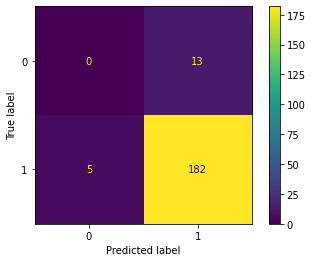

In [23]:
from sklearn.svm import SVC

clf = SVC(probability = True, kernel='rbf')
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

c_matrix = confusion_matrix(y_pred, y_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=clf.classes_)
disp.plot()
plt.show()


In [24]:
false_positives = (y_test == 0) == (y_pred == 1)
print('Number of False Positives:', sum(false_positives))

false_positives_list = pd.DataFrame( X_test, false_positives)
print('Number of Reviews:', len(false_positives_list))
print(false_positives)
false_positives_list.iloc[0:4]


Number of False Positives: 18
Number of Reviews: 200
[False False False False False False  True  True False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False  True  True False False  True
 False False  True False False  True False False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False Fals

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
False,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
False,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
False,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
False,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
